# K-Nearest Neighbors Regressor - A linear problem

### Importing the relevant libraries

In [1]:
# This method will help us create the regression
from sklearn.datasets import make_regression

# This method will help us split the data into training and testing datasets
from sklearn.model_selection import train_test_split

# This class will help us create a KNN regression model
from sklearn.neighbors import KNeighborsRegressor

# This class will help us create a Linear regression model
from sklearn.linear_model import LinearRegression

# This method will help us calculate the mean squared error for each model
from sklearn.metrics import mean_squared_error

# This library will help us organize our data
import pandas as pd

# These libraries will help us visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

### Defining the regression

In [2]:
# Create a regression dataset with 300 samples and a single feature.
# Introduce some noise in the data.
# Set a random state, so that the problem is reproducible, that is, each run of the cell produces the same dataset.
inputs, target = make_regression(n_samples = 300, 
                                 n_features = 1, 
                                 noise = 15,
                                 random_state = 365)

In [3]:
# Since we have generated our own dataset, we are free to modify it at our will.
# Here, we make the dataset easier to work with by lowering the value of the targets.
# Note that this is *not* something you would do with a real-world dataset!
target = target/100

### Visualizing the regression

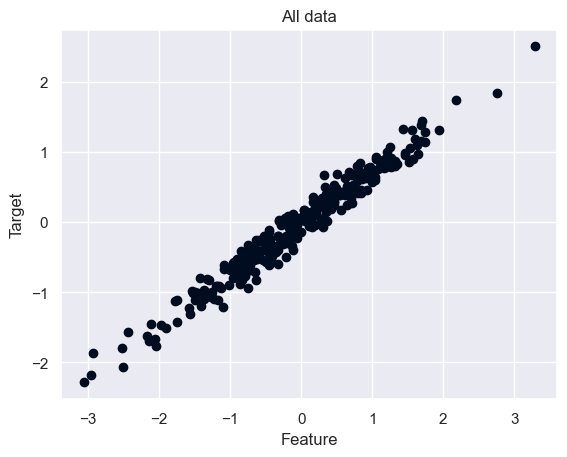

In [4]:
# Set the seaborn visualization
sns.set()

# Plot the target versus the inputs and choose a color for the datapoints
plt.scatter(inputs, target, color = '#000C1F')
# Add a title to the plot
plt.title('All data')
# Add a label to the x-axis
plt.xlabel('Feature')
# Add a label to the y-axis
plt.ylabel('Target');

### Split the data into training and testing sets. Visualize both datasets

In [5]:
# Split the data into training and testing sets such that 20% of all points are dedicated to testing.
# Set a random state so that the split is reproducible.
x_train, x_test, y_train, y_test = train_test_split(inputs, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 365)

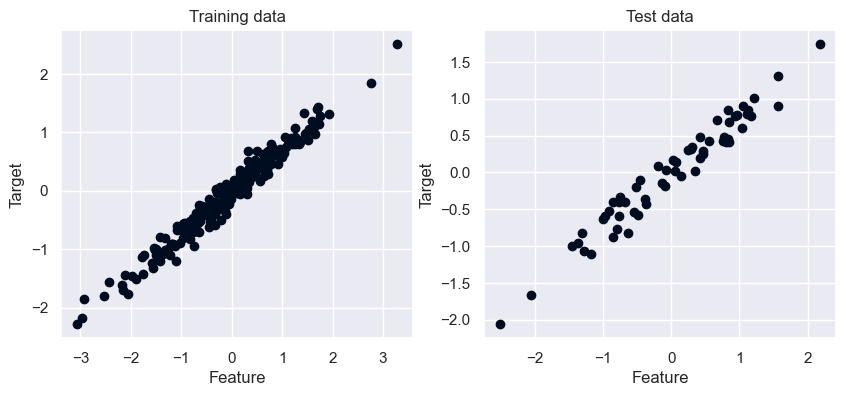

In [6]:
# Set the seaborn visualization
sns.set()

# Create two subplots which are aligned horizontally. Set a specific size for the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Plot the training dataset
ax1.scatter(x_train, y_train, color = '#000C1F')
ax1.set_title('Training data')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

# Plot the test dataset
ax2.scatter(x_test, y_test, color = '#000C1F')
ax2.set_title('Test data')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target');

### Fit a linear regression and multiple KNN-regressions

In [7]:
# Create an instance of LinearRegression()
reg_lin = LinearRegression()

# Fit the linear regression to the training set
reg_lin.fit(x_train, y_train)

# Make predictions on the test set
y_pred_lin = reg_lin.predict(x_test)

# Create an array where all predictions from the KNN regressions will be stored
y_pred_knn = []

# Create KNN regression models with K = 1, 10, and 40
for i in [1, 10, 40]:
    # Create an instance of the KNN regressor with the specified number of neighbors
    reg_knn = KNeighborsRegressor(n_neighbors = i)
    # Fit the model to the training data
    reg_knn.fit(x_train, y_train)
    # Make predictions on the test data and store it in the y_pred_knn variable
    y_pred_knn.append(reg_knn.predict(x_test))

### Sort the data according to the test features

In [8]:
# In order to visualize the regressions well, we need to sort the data with respect to the test features

df = pd.DataFrame(data = {'x_test':list(x_test.flatten()), 
                          'y_test':list(y_test.flatten()), 
                          'y_pred_lin':list(y_pred_lin.flatten()), 
                          'y_pred_knn-1':list(y_pred_knn[0].flatten()), 
                          'y_pred_knn-10':list(y_pred_knn[1].flatten()), 
                          'y_pred_knn-40':list(y_pred_knn[2].flatten())})

# To check how the visualization looks like without sorting the data, comment out the line below,
# run the cell and then run the next 2 cells.
df = df.sort_values(by = ['x_test'])

x_test_sorted = df['x_test'].tolist()
y_test_sorted = df['y_test'].tolist()
y_pred_lin_sorted = df['y_pred_lin'].tolist()
y_pred_knn1_sorted = df['y_pred_knn-1'].tolist()
y_pred_knn10_sorted = df['y_pred_knn-10'].tolist()
y_pred_knn40_sorted = df['y_pred_knn-40'].tolist()

### Visualize the linear regression on top of the test data

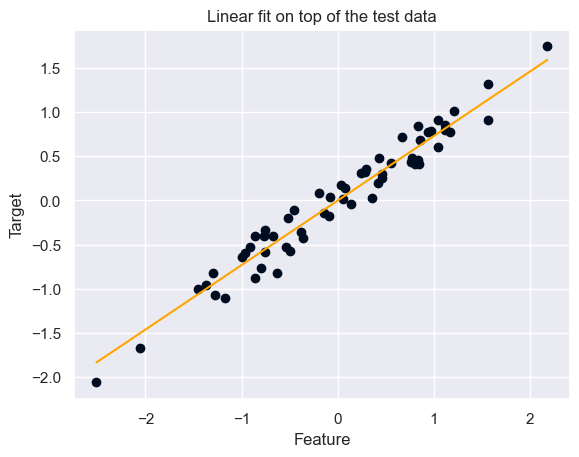

In [9]:
# Set the seaborn visualization
sns.set()

# Plot the sorted true test targets versus the sorted test features. Choose a dark color
plt.scatter(x_test_sorted, 
            y_test_sorted, 
            color = '#000C1F')

# Plot the sorted predicted test targets versus the sorted test features. Choose a bright color
plt.plot(x_test_sorted, 
         y_pred_lin_sorted, 
         color = 'orange');

# Set a title
plt.title('Linear fit on top of the test data')
# Set a label to the x-axis
plt.xlabel('Feature')
# Set a label to the y-axis
plt.ylabel('Target');

### Visualize three KNN regressions for K = 1, 10, and 40 on top of the test data

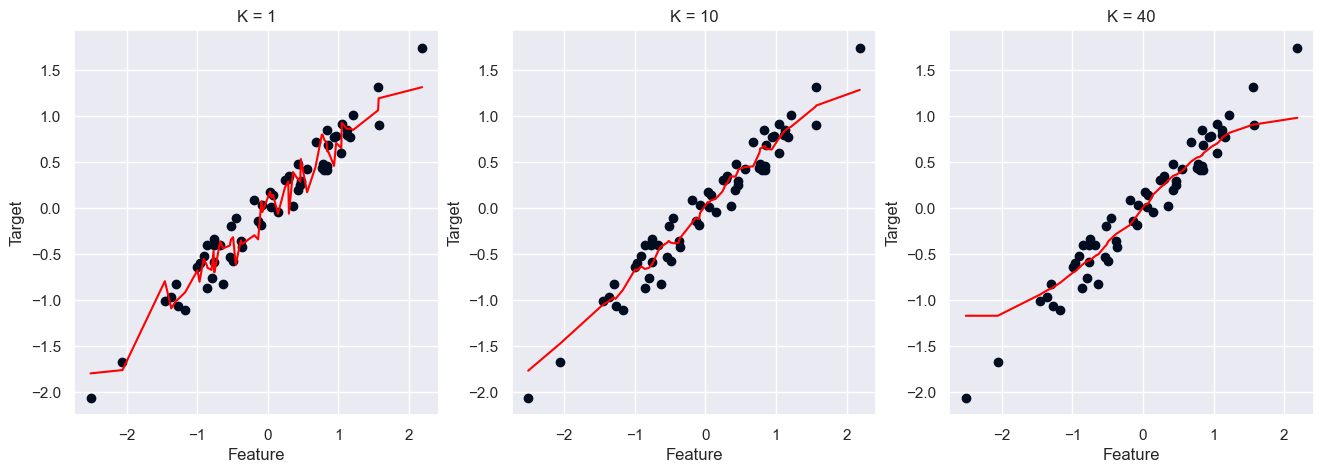

In [10]:
# Set the seaborn visualization
sns.set()

# Create 3 subfigures aligned horizontally.
# The first figure will represent a KNN fit for K = 1.
# The second figure will represent a KNN fit for K = 10.
# The third figure will represent a KNN fit for K = 40.
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(16, 5))

# Plot the sorted true test targets versus the sorted test features. Choose a dark color.
# Plot these datapoint on all 3 figures.
ax1.scatter(x_test_sorted, y_test_sorted, color = '#000C1F')
ax2.scatter(x_test_sorted, y_test_sorted, color = '#000C1F')
ax3.scatter(x_test_sorted, y_test_sorted, color = '#000C1F')

# Plot as a line the sorted predicted test targets (for K = 1) versus the sorted test features. 
# Choose a red color.
# Set a title and axes labels.
ax1.plot(x_test_sorted, 
         y_pred_knn1_sorted, 
         color = 'red')
ax1.set_title('K = 1')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

# Plot as a line the sorted predicted test targets (for K = 10) versus the sorted test features. 
# Choose a red color.
# Set a title and axes labels.
ax2.plot(x_test_sorted, 
         y_pred_knn10_sorted, 
         color = 'red')
ax2.set_title('K = 10')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target')

# Plot as a line the sorted predicted test targets (for K = 40) versus the sorted test features. 
# Choose a red color.
# Set a title and axes labels.
ax3.plot(x_test_sorted, 
         y_pred_knn40_sorted, 
         color = 'red')
ax3.set_title('K = 40')
ax3.set_xlabel('Feature')
ax3.set_ylabel('Target');

### Calculate the MSE

In [11]:
# Choose a maximum number of nearest neighbors and add 1. 
# That is, choose the value 41 to set a maximum value of 40.
# The reason we add the 1 is because this number is then used in a range() function in the following way:
# range(1, k)
# The range() function includes the first number but excludes the second one.
k = 41

# Create an array where all mean-squared error (MSE) values from the linear regression will be stored.
mse_lin = []

# Calculate the MSE value for the linear regression
mse_lin = mean_squared_error(y_test, y_pred_lin)

# The MSE value calculated above is the same for all values of K. 
# Therefore, we create an array storing that MSE value (k-1) many times.
# This will later be used to plot the MSE value versus the number of nearest neighbors.
mse_lin = [mse_lin]*(k-1)

# Create an array where all MSE values from the KNN regressions will be stored.
mse_knn = []

# Loop through all K-values
for i in range(1, k):
    
    # Create an instance of the KNN regression for the specified value of K
    reg_knn = KNeighborsRegressor(n_neighbors = i)
    
    # Fir the training data to the model
    reg_knn.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred_knn = reg_knn.predict(x_test)
    
    # Calculate the MSE value for this regression and store it in the array
    mse_knn.append(mean_squared_error(y_test, y_pred_knn))

### Plot the MSE versus the number of neighbors

In [ ]:
# Set the seaborn visualization
sns.set()

# Create a placeholder for a figure
fig, ax = plt.subplots()

# Plot the MSE of the linear regression versus the value of K.
# Since the linear regression is not affected by the value of K, the output is a straight line.
# Choose a color.
# Choose a label which will describe the line in the legend
ax.plot(list(range(1, k)), 
        mse_lin, 
        color = 'orange', 
        label = 'linear')

# Plot the MSE of the KNN regressions versus the value of K.
# Choose a color for the line.
# Use a marker to show the values of K.
# Choose a color for the marker
# Choose a label which will describe the line in the legend
ax.plot(list(range(1, k)), 
        mse_knn, 
        color = 'red', 
        marker = 'o', 
        markerfacecolor = '#000C1F', 
        label = 'KNN')

# Place the legend in the lower right corner
ax.legend(loc='lower right')

# Set a title and axes labes
ax.set_title('Mean-Squared Error (MSE)')
ax.set_xlabel('K')
ax.set_ylabel('MSE')

# Set a minimum value of the y-axis
plt.ylim(0);

A parametric (linear) model solve the problem better than a non-parametric (knn) model

A parametric approach is superior when the true dependence is known